In [2]:
# import modules
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly, GDT_Float32
import numpy as np




In [3]:
# Define variables
data_path4 = "/home/user/git/GeoScripting/data/LC81980242014260LGN00_sr_band4.tif"
data_path5 = "/home/user/git/GeoScripting/data/LC81980242014260LGN00_sr_band5.tif"



In [4]:
dataSource4 = gdal.Open(data_path4 , GA_ReadOnly)
dataSource5 = gdal.Open(data_path5 , GA_ReadOnly)

Read layers and compute NDWI



In [5]:
# Read data into an array
band4Arr = dataSource4.ReadAsArray(0,0,dataSource4.RasterXSize, dataSource4.RasterYSize)
band5Arr = dataSource5.ReadAsArray(0,0,dataSource5.RasterXSize, dataSource5.RasterYSize)

In [6]:
# set the data type
band4Arr=band4Arr.astype(np.float32)
band5Arr=band5Arr.astype(np.float32)

In [7]:
# Derive the NDWI
mask = np.greater(band4Arr+band5Arr,0)

In [8]:
# set np.errstate to avoid warning of invalid values (i.e. NaN values) in the divide 
with np.errstate(invalid='ignore'):
    ndwi = np.choose(mask,(-99,(band4Arr-band5Arr)/(band4Arr+band5Arr)))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [9]:
print "NDWI min and max values", ndwi.min(), ndwi.max()
# Check the real minimum value
print ndwi[ndwi>-99].min()

NDWI min and max values -99.0 21.3333
-2.36481


In [10]:
# Write the result to disk
driver = gdal.GetDriverByName('GTiff')

In [11]:
outDataSet=driver.Create('/home/user/git/GeoScripting/data/ndwi.tif', dataSource4.RasterXSize, dataSource4.RasterYSize, 1, GDT_Float32)
outBand = outDataSet.GetRasterBand(1)
outBand.WriteArray(ndwi,0,0)
outBand.SetNoDataValue(-99)

0

In [12]:
# set the projection and extent information of the dataset
outDataSet.SetProjection(dataSource4.GetProjection())
outDataSet.SetGeoTransform(dataSource4.GetGeoTransform())

0

In [13]:
outBand.FlushCache()
outDataSet.FlushCache()

In [14]:
!gdalwarp -t_srs "EPSG:4326" /home/user/git/GeoScripting/data/ndwi.tif /home/user/git/GeoScripting/data/ndwi_ll.tif

Processing input file /home/user/git/GeoScripting/data/ndwi.tif.
Using internal nodata values (e.g. -99) for image /home/user/git/GeoScripting/data/ndwi.tif.
Copying nodata values from source /home/user/git/GeoScripting/data/ndwi.tif to destination /home/user/git/GeoScripting/data/ndwi_ll.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [15]:
!gdalinfo /home/user/git/GeoScripting/data/ndwi.tif
!gdalinfo /home/user/git/GeoScripting/data/ndwi_ll.tif


Driver: GTiff/GeoTIFF
Files: /home/user/git/GeoScripting/data/ndwi.tif
Size is 7791, 7911
Coordinate System is:
PROJCS["WGS 84 / UTM zone 31N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",3],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","32631"]]
Origin = (529185.000000000000000,5847015.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  529185.000, 5847015.000) (  3d

Visualise the result

In [16]:
%matplotlib inline
from osgeo import gdal
import matplotlib.pyplot as plt

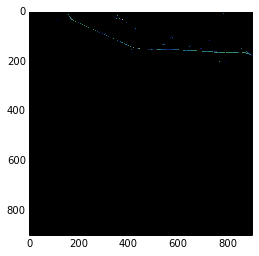

In [27]:
# Open image
dsll = gdal.Open("/home/user/git/GeoScripting/data/ndwi_ll.tif")

# Read raster data
ndwi = dsll.ReadAsArray(0, 0, dsll.RasterXSize, dsll.RasterYSize)
# because of memory problem we will crop the image

ndwi_crop = ndwi[5000:5900, 5000:5900]
plt.imshow(ndwi_crop, interpolation='nearest', vmin=0, cmap=plt.cm.gist_earth)
plt.show()
